In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [5]:
def make_df_reg(reg):
    ramah_dict = {}
    marah_dict = {}

    for gangguan in df['gangguan_v2'].value_counts().head(6).index:
        ramah_perc = round(df['emosi'][(df['gangguan_v2'] == gangguan) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        if ramah_perc not in ramah_dict:
            ramah_dict[gangguan] = ramah_perc

        marah_perc = round(df['emosi'][(df['gangguan_v2'] == gangguan) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        if marah_perc not in marah_dict:
            marah_dict[gangguan] = marah_perc
            
    
    plot = pd.DataFrame(list(marah_dict.items()), columns = ['gangguan', 'marah_perc'])
    plot = plot.sort_values(by='marah_perc', ascending=True)
    plot['reg'] = reg
    
    return plot

In [6]:
start_time = time.time()

plot1 = make_df_reg(reg=1)
plot2 = make_df_reg(reg=2)
plot3 = make_df_reg(reg=3)
plot4 = make_df_reg(reg=4)
plot5 = make_df_reg(reg=5)
plot6 = make_df_reg(reg=6)
plot7 = make_df_reg(reg=7)

df_conc = pd.concat([plot1, plot2, plot3, plot4, plot5, plot6, plot7])

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 23.716439247131348


In [8]:
df_conc = df_conc.reset_index(drop=True)

In [9]:
df_conc

,gangguan,marah_perc,reg
0,Gangguan Game Online,15.86,1
1,Tidak Bisa Koneksi,25.78,1
2,Tidak Bisa ke Website Tertentu,31.41,1
3,2P / 3P Mati Total,35.09,1
4,Intermitten / Putus-Putus,37.00,1
5,Lambat,39.45,1
6,Gangguan Game Online,18.89,2
7,Tidak Bisa Koneksi,29.83,2
8,Tidak Bisa ke Website Tertentu,36.16,2
9,2P / 3P Mati Total,38.26,2


In [10]:
ramah_dict = {}
marah_dict = {}

for gangguan in df['gangguan_v2'].value_counts().head(6).index:
    ramah_perc = round(df['emosi'][df['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    if ramah_perc not in ramah_dict:
        ramah_dict[gangguan] = ramah_perc
        
    marah_perc = round(df['emosi'][df['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    if marah_perc not in marah_dict:
        marah_dict[gangguan] = marah_perc

In [12]:
plot_all = pd.DataFrame(list(marah_dict.items()), columns = ['gangguan', 'marah_perc'])
plot_all = plot_all.sort_values(by='marah_perc', ascending=True)

In [13]:
plot_all

,gangguan,marah_perc
4,Gangguan Game Online,14.75
0,Tidak Bisa Koneksi,27.26
5,Tidak Bisa ke Website Tertentu,34.30
1,2P / 3P Mati Total,36.60
3,Intermitten / Putus-Putus,40.50
2,Lambat,43.00


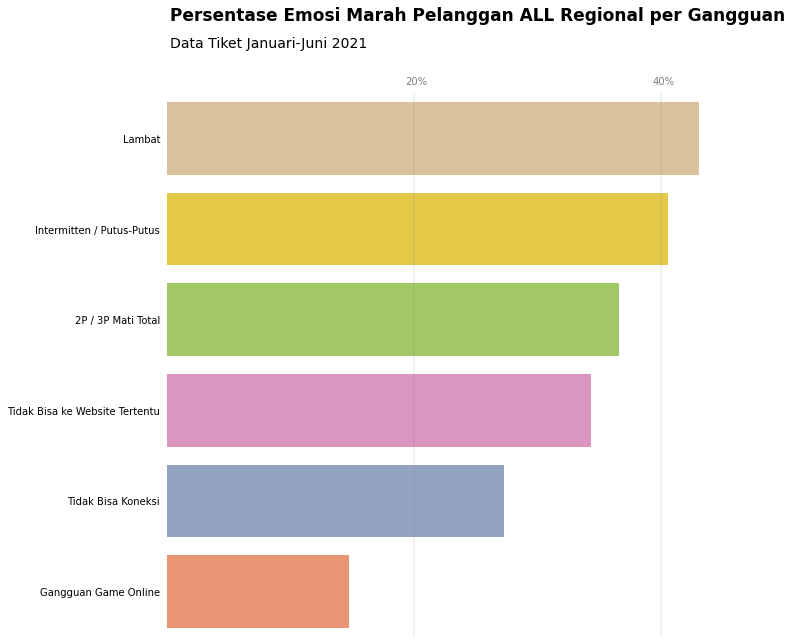

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.barplot(ax=ax, data=plot_all.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_yticklabels(['Lambat', 'Intermitten / Putus-Putus', '2P / 3P Mati Total', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6'])
ax.set_xticks([])
ax.text(x=19.3, y=-0.6, s='20%', alpha=0.5)
ax.text(x=39.3, y=-0.6, s='40%', alpha=0.5)
# ax.text(x=49.5, y=-0.6, s='50%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
ax.axvline(x=20, color='grey', alpha=0.15)
ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=50, color='grey', alpha=0.15)

ax.text(x=0.2, y=-1.3, s='Persentase Emosi Marah Pelanggan ALL Regional per Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-1, s='Data Tiket Januari-Juni 2021', size=14)

plt.show();

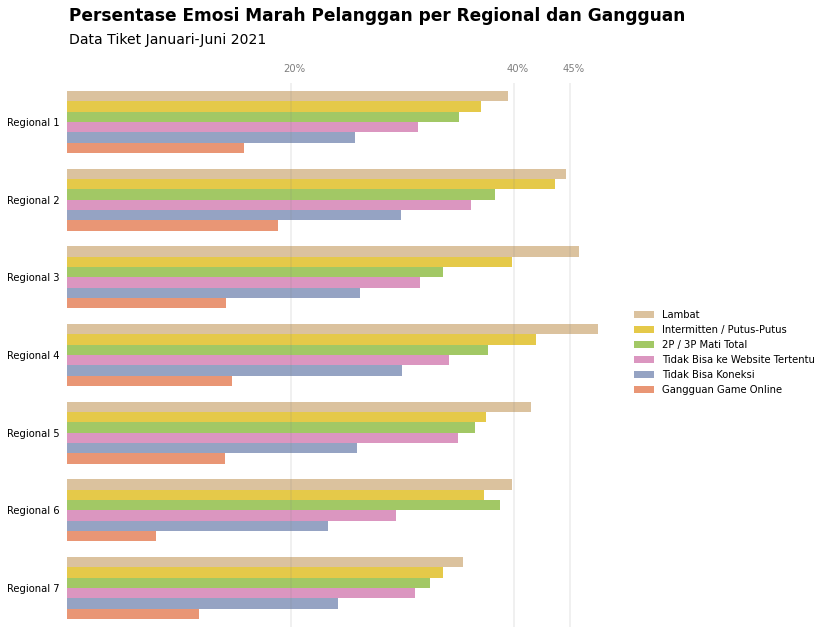

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='reg', hue='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Regional 1', 'Regional 2', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6', 'Regional 7'])
ax.set_xticks([])
ax.text(x=19.3, y=-0.65, s='20%', alpha=0.5)
ax.text(x=39.3, y=-0.65, s='40%', alpha=0.5)
ax.text(x=44.3, y=-0.65, s='45%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

ax.legend(frameon=False, bbox_to_anchor=(1, 0.6))
ax.axvline(x=20, color='grey', alpha=0.15)
ax.axvline(x=40, color='grey', alpha=0.15)
ax.axvline(x=45, color='grey', alpha=0.15)

ax.text(x=0.2, y=-1.3, s='Persentase Emosi Marah Pelanggan per Regional dan Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-1, s='Data Tiket Januari-Juni 2021', size=14)

plt.show();

# -----
## Checkpoint
# -----

In [41]:
df_conc

,gangguan,marah_perc,reg
0,Gangguan Game Online,15.86,1
1,Tidak Bisa Koneksi,25.78,1
2,Tidak Bisa ke Website Tertentu,31.41,1
3,2P / 3P Mati Total,35.09,1
4,Intermitten / Putus-Putus,37.00,1
5,Lambat,39.45,1
6,Gangguan Game Online,18.89,2
7,Tidak Bisa Koneksi,29.83,2
8,Tidak Bisa ke Website Tertentu,36.16,2
9,2P / 3P Mati Total,38.26,2


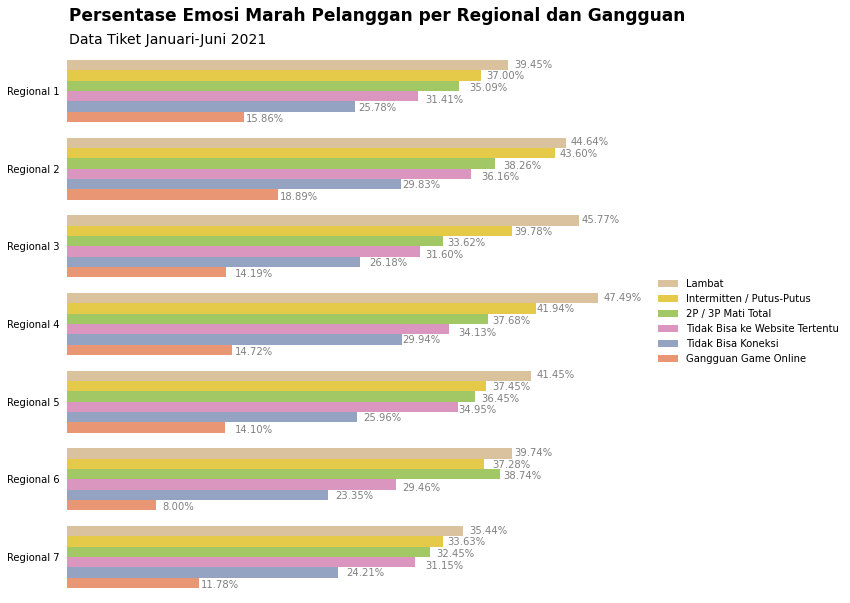

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='reg', hue='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Regional 1', 'Regional 2', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6', 'Regional 7'])
ax.set_xticks([])
# ax.text(x=19.3, y=-0.65, s='20%', alpha=0.5)
# ax.text(x=39.3, y=-0.65, s='40%', alpha=0.5)
# ax.text(x=44.3, y=-0.65, s='45%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

ax.legend(frameon=False, bbox_to_anchor=(1.4, 0.6))
# ax.axvline(x=20, color='grey', alpha=0.15)
# ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=45, color='grey', alpha=0.15)

ax.text(x=0.2, y=-0.9, s='Persentase Emosi Marah Pelanggan per Regional dan Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# Annotate lambat
ax.text(x=40, y=-0.3, s='39.45%', alpha=0.5)
ax.text(x=45, y=0.7, s='44.64%', alpha=0.5)
ax.text(x=46, y=1.7, s='45.77%', alpha=0.5)
ax.text(x=48, y=2.7, s='47.49%', alpha=0.5)
ax.text(x=42, y=3.7, s='41.45%', alpha=0.5)
ax.text(x=40, y=4.7, s='39.74%', alpha=0.5)
ax.text(x=36, y=5.7, s='35.44%', alpha=0.5)

# Annotate Intermitten / Putus-Putus
ax.text(x=37.5, y=-0.15, s='37.00%', alpha=0.5)
ax.text(x=44, y=0.85, s='43.60%', alpha=0.5)
ax.text(x=40, y=1.85, s='39.78%', alpha=0.5)
ax.text(x=42, y=2.85, s='41.94%', alpha=0.5)
ax.text(x=38, y=3.85, s='37.45%', alpha=0.5)
ax.text(x=38, y=4.85, s='37.28%', alpha=0.5)
ax.text(x=34, y=5.85, s='33.63%', alpha=0.5)

# Annotate 2P / 3P Mati Total
ax.text(x=36, y=0, s='35.09%', alpha=0.5)
ax.text(x=39, y=1, s='38.26%', alpha=0.5)
ax.text(x=34, y=2, s='33.62%', alpha=0.5)
ax.text(x=38, y=3, s='37.68%', alpha=0.5)
ax.text(x=37, y=4, s='36.45%', alpha=0.5)
ax.text(x=39, y=5, s='38.74%', alpha=0.5)
ax.text(x=33, y=6, s='32.45%', alpha=0.5)

# Annotate Tidak Bisa ke Website Tertentu
ax.text(x=32, y=0.15, s='31.41%', alpha=0.5)
ax.text(x=37, y=1.15, s='36.16%', alpha=0.5)
ax.text(x=32, y=2.15, s='31.60%', alpha=0.5)
ax.text(x=35, y=3.15, s='34.13%', alpha=0.5)
ax.text(x=35, y=4.15, s='34.95%', alpha=0.5)
ax.text(x=30, y=5.15, s='29.46%', alpha=0.5)
ax.text(x=32, y=6.15, s='31.15%', alpha=0.5)

# Annotate Tidak Bisa Koneksi
ax.text(x=26, y=0.25, s='25.78%', alpha=0.5)
ax.text(x=30, y=1.25, s='29.83%', alpha=0.5)
ax.text(x=27, y=2.25, s='26.18%', alpha=0.5)
ax.text(x=30, y=3.25, s='29.94%', alpha=0.5)
ax.text(x=26.5, y=4.25, s='25.96%', alpha=0.5)
ax.text(x=24, y=5.25, s='23.35%', alpha=0.5)
ax.text(x=25, y=6.25, s='24.21%', alpha=0.5)

# Annotate Tidak Bisa Koneksi
ax.text(x=16, y=0.4, s='15.86%', alpha=0.5)
ax.text(x=19, y=1.4, s='18.89%', alpha=0.5)
ax.text(x=15, y=2.4, s='14.19%', alpha=0.5)
ax.text(x=15, y=3.4, s='14.72%', alpha=0.5)
ax.text(x=15, y=4.4, s='14.10%', alpha=0.5)
ax.text(x=8.5, y=5.4, s='8.00%', alpha=0.5)
ax.text(x=12, y=6.4, s='11.78%', alpha=0.5)

plt.show();

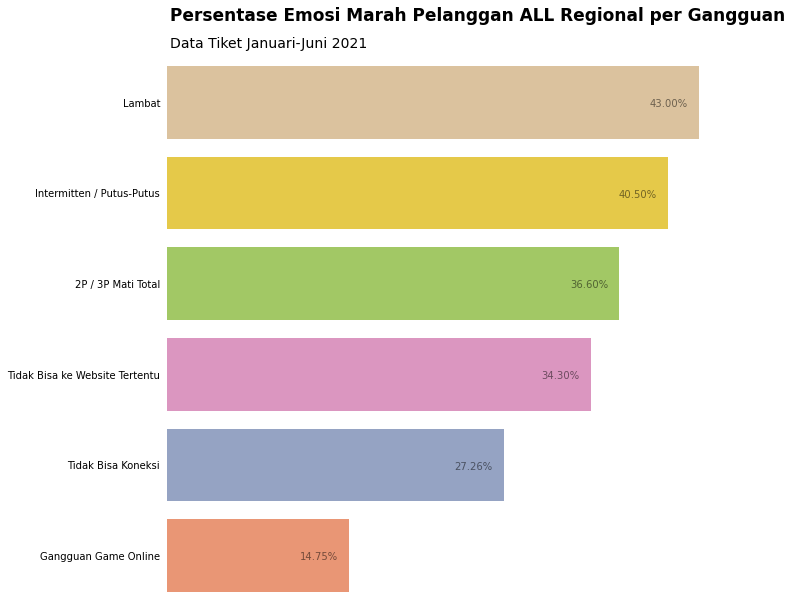

In [137]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.barplot(ax=ax, data=plot_all.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_yticklabels(['Lambat', 'Intermitten / Putus-Putus', '2P / 3P Mati Total', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6'])
ax.set_xticks([])
# ax.text(x=19.3, y=-0.6, s='20%', alpha=0.5)
# ax.text(x=39.3, y=-0.6, s='40%', alpha=0.5)
# ax.text(x=49.5, y=-0.6, s='50%', alpha=0.5)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
# ax.axvline(x=20, color='grey', alpha=0.15)
# ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=50, color='grey', alpha=0.15)

ax.text(x=0.2, y=-0.9, s='Persentase Emosi Marah Pelanggan ALL Regional per Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# Annotate
ax.text(x=39, y=0.05, s='43.00%', alpha=0.5)
ax.text(x=36.5, y=1.05, s='40.50%', alpha=0.5)
ax.text(x=32.6, y=2.05, s='36.60%', alpha=0.5)
ax.text(x=30.30, y=3.05, s='34.30%', alpha=0.5)
ax.text(x=23.26, y=4.05, s='27.26%', alpha=0.5)
ax.text(x=10.75, y=5.05, s='14.75%', alpha=0.5)

plt.show();

In [113]:
plot_all

,gangguan,marah_perc
4,Gangguan Game Online,14.75
0,Tidak Bisa Koneksi,27.26
5,Tidak Bisa ke Website Tertentu,34.30
1,2P / 3P Mati Total,36.60
3,Intermitten / Putus-Putus,40.50
2,Lambat,43.00
